##Project Overview

This project explores the performance of various YouTube media niches in Nigeria, with the goal of identifying which content categories attract the highest levels of audience engagement and viewer retention. The analysis was conducted to support strategic decision-making in content creation, marketing, and audience targeting.

Using data obtained through the YouTube Data API, the project analyzed public metrics across key media niches including entertainment, music, lifestyle, education, technology, sports, and news. The focus was to uncover measurable trends that reveal audience preferences, engagement behavior, and growth potentials.

##Key objectives

Evaluating which YouTube niches generate the most consistent audience engagement.

Identifying emerging areas of opportunity for digital creators and media investors.

Providing actionable insights to guide content strategy and brand positioning.

This notebook therefore combines data collection, visualization, and interpretation to produce insights that are not only statistically valid but also strategically valuable for stakeholders seeking to expand their digital media influence on YouTube.

In [2]:
from googleapiclient.discovery import build
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [3]:

# Building the API connection
API_KEY = ""
#removed Api KEY FOR github sharing

youtube = build('youtube', 'v3', developerKey=API_KEY)


In [5]:
# Media niches or topics
search_terms = [
    "sports news",
    "podcasts",
    "educational videos",
    "music reviews",
    "technology reviews",
    "gaming videos"
    "Lifestyle"
]


In [6]:
def get_videos_by_keyword(keyword, max_results=20):
    results = youtube.search().list(
        q=keyword,
        part="snippet",
        type="video",
        order="viewCount",
        maxResults=max_results
    ).execute()
    
    videos = []
    for item in results['items']:
        videos.append({
            'keyword': keyword,
            'video_id': item['id']['videoId'],
            'title': item['snippet']['title'],
            'channel': item['snippet']['channelTitle'],
            'published_at': item['snippet']['publishedAt']
        })
    return videos

# Collect data for all search terms
all_videos = []
for term in search_terms:
    all_videos.extend(get_videos_by_keyword(term))

df_videos = pd.DataFrame(all_videos)
df_videos.head()

,keyword,video_id,title,channel,published_at
0,sports news,Nq2wYlWFucg,Aaj Tak LIVE TV: Pakistan-Afghaistan Conflict ...,Aaj Tak,2022-11-16T12:42:23Z
1,sports news,1wECsnGZcfc,24 News Live TV | Live Updates | Malayalam Ne...,24 News,2024-02-19T03:55:22Z
2,sports news,RqUZ2Fv9l8w,🔴 ARY NEWS LIVE | Latest Pakistan News 𝟐𝟒/𝟕 | ...,ARY News,2025-04-11T16:31:43Z
3,sports news,F4dIxethVAY,🤣🤪 Bad Day in Women&#39;s Sports #shorts,Mr. Monpel,2023-05-05T13:11:15Z
4,sports news,YDvsBbKfLPA,Watch Sky News,Sky News,2024-12-10T12:06:22Z


In [7]:
def get_video_details(video_ids):
    stats = []
    for i in range(0, len(video_ids), 50):  # API limit = 50 per request
        response = youtube.videos().list(
            part="statistics,snippet",
            id=",".join(video_ids[i:i+50])
        ).execute()
        
        for item in response['items']:
            stats.append({
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'channel': item['snippet']['channelTitle'],
                'views': int(item['statistics'].get('viewCount', 0)),
                'likes': int(item['statistics'].get('likeCount', 0)),
                'comments': int(item['statistics'].get('commentCount', 0)),
                'category': item['snippet'].get('categoryId', 'N/A')
            })
    return stats

video_ids = df_videos['video_id'].tolist()
details = get_video_details(video_ids)

df_details = pd.DataFrame(details)
df_full = pd.merge(df_videos, df_details, on=['video_id', 'title', 'channel'], how='left')

df_full.head()


,keyword,video_id,title,channel,published_at,views,likes,comments,category
0,sports news,Nq2wYlWFucg,Aaj Tak LIVE TV: Pakistan-Afghaistan Conflict ...,Aaj Tak,2022-11-16T12:42:23Z,2.823175e+09,2404306.0,0.0,25
1,sports news,1wECsnGZcfc,24 News Live TV | Live Updates | Malayalam Ne...,24 News,2024-02-19T03:55:22Z,8.983724e+08,664211.0,0.0,25
2,sports news,RqUZ2Fv9l8w,🔴 ARY NEWS LIVE | Latest Pakistan News 𝟐𝟒/𝟕 | ...,ARY News,2025-04-11T16:31:43Z,1.844607e+08,293198.0,0.0,25
3,sports news,F4dIxethVAY,🤣🤪 Bad Day in Women&#39;s Sports #shorts,Mr. Monpel,2023-05-05T13:11:15Z,NaN,NaN,NaN,NaN
4,sports news,YDvsBbKfLPA,Watch Sky News,Sky News,2024-12-10T12:06:22Z,7.761493e+07,63043.0,0.0,25


In [8]:
df_full['engagement_rate'] = (df_full['likes'] + df_full['comments']) / df_full['views'] * 100
df_full['engagement_rate'] = df_full['engagement_rate'].replace([np.inf, -np.inf], 0)


C:\Users\A\anaconda3 02\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\A\anaconda3 02\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\A\anaconda3 02\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127850 (\N{COOKIE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\A\anaconda3 02\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128167 (\N{DROPLET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\A\anaconda3 02\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127946 (\N{SWIMMER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


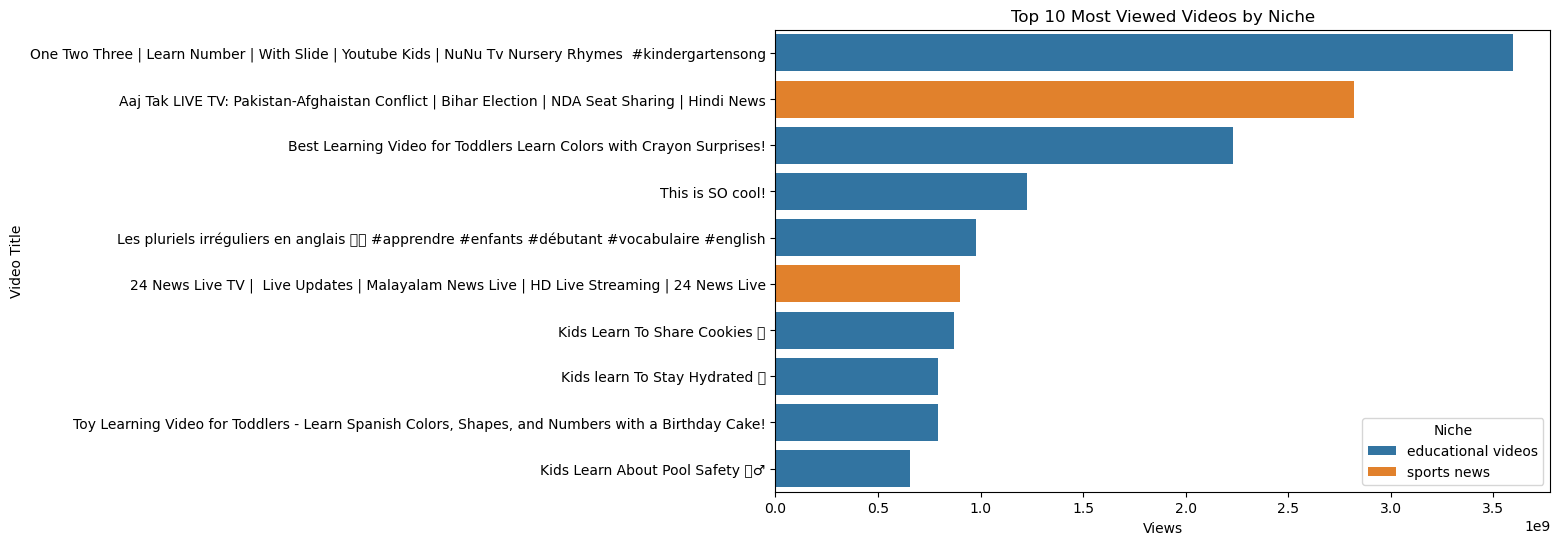

In [9]:
top_videos = df_full.sort_values(by='views', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_videos, y='title', x='views', hue='keyword', dodge=False)
plt.title("Top 10 Most Viewed Videos by Niche")
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.legend(title="Niche")
plt.show()


In [11]:
avg_engagement = df_full.groupby('keyword')[['views', 'likes', 'comments', 'engagement_rate']].mean().sort_values(by='views', ascending=False)
avg_engagement = avg_engagement.round(2)
avg_engagement


,views,likes,comments,engagement_rate
keyword,,,,
educational videos,7.915468e+08,5238376.26,634.26,0.64
sports news,2.595386e+08,382157.00,3996.25,1.35
technology reviews,2.553394e+07,956713.00,7702.16,3.84
podcasts,2.486579e+07,752819.53,5231.60,2.88
music reviews,9.528984e+06,433120.12,11281.88,4.34
gaming videosLifestyle,3.050000e+01,4.00,1.00,32.63


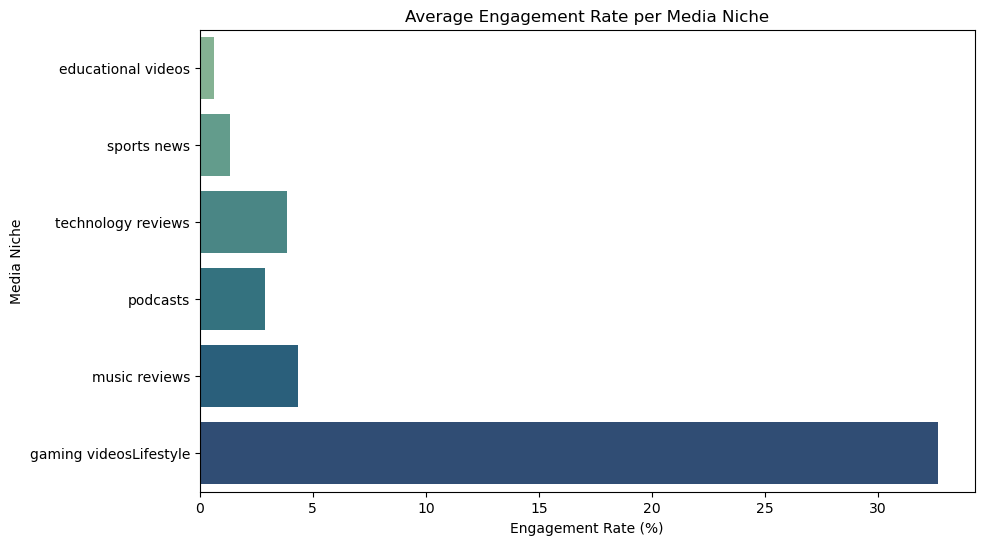

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(data=avg_engagement.reset_index(), x='engagement_rate', y='keyword', palette='crest')
plt.title("Average Engagement Rate per Media Niche")
plt.xlabel("Engagement Rate (%)")
plt.ylabel("Media Niche")
plt.show()


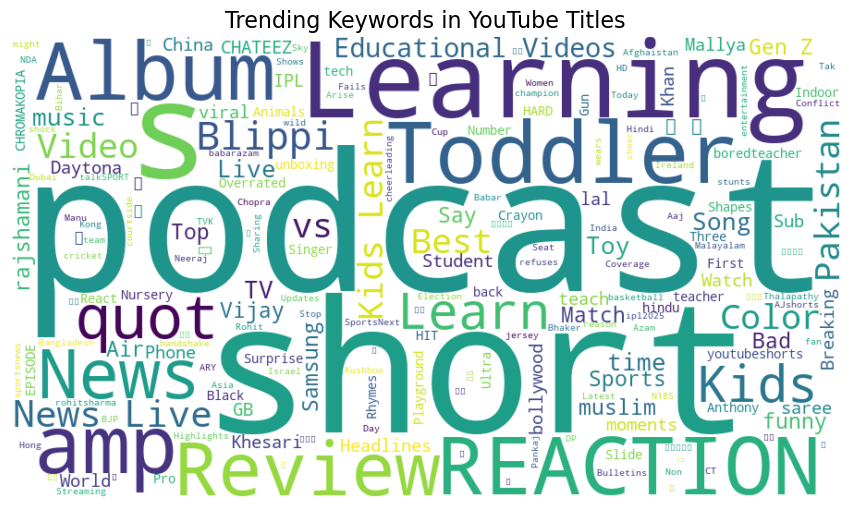

In [13]:
text = " ".join(df_full['title'])
wordcloud = WordCloud(width=900, height=500, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Trending Keywords in YouTube Titles", fontsize=16)
plt.show()


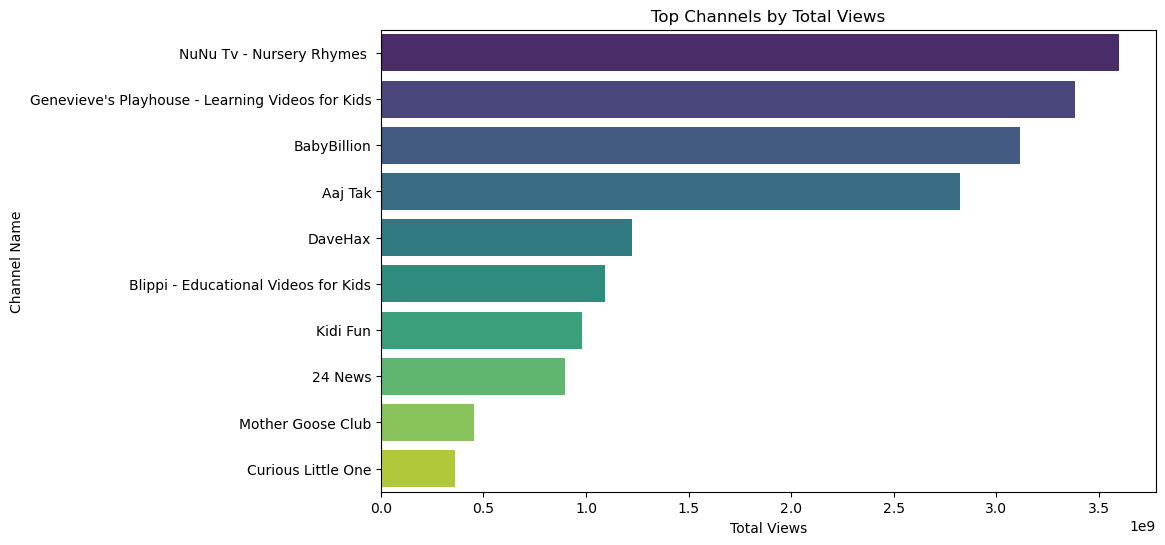

In [14]:
top_channels = df_full.groupby('channel')['views'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_channels.values, y=top_channels.index, palette='viridis')
plt.title("Top Channels by Total Views")
plt.xlabel("Total Views")
plt.ylabel("Channel Name")
plt.show()


In [15]:
summary = avg_engagement.copy()
summary['category'] = summary['views'].apply(lambda v: 'High Reach' if v > summary['views'].mean() else 'Low Reach')
summary['status'] = summary['engagement_rate'].apply(lambda e: 'Engaging' if e > summary['engagement_rate'].mean() else 'Weak')

display(summary)


,views,likes,comments,engagement_rate,category,status
keyword,,,,,,
educational videos,7.915468e+08,5238376.26,634.26,0.64,High Reach,Weak
sports news,2.595386e+08,382157.00,3996.25,1.35,High Reach,Weak
technology reviews,2.553394e+07,956713.00,7702.16,3.84,Low Reach,Weak
podcasts,2.486579e+07,752819.53,5231.60,2.88,Low Reach,Weak
music reviews,9.528984e+06,433120.12,11281.88,4.34,Low Reach,Weak
gaming videosLifestyle,3.050000e+01,4.00,1.00,32.63,Low Reach,Engaging


In [16]:
df_full.to_csv("youtube_media_niches_analysis.csv", index=False)

In [17]:
#Analysing media niches for nigeria
nigerian_niches = [
    "Nigerian music",
    "comedy skits",
    "news and politics Nigeria",
    "football highlights Nigeria",
    "gospel music Nigeria",
    " Nollywood movies",
    "tech reviews Nigeria",
    "educational videos Nigeria",
    "podcasts Nigeria"
]


In [18]:
def get_videos_by_keyword(keyword, max_results=20):
    results = youtube.search().list(
        q=keyword,
        part="snippet",
        type="video",
        order="viewCount",
        regionCode="NG",
        maxResults=max_results
    ).execute()
    
    videos = []
    for item in results['items']:
        videos.append({
            'keyword': keyword,
            'video_id': item['id']['videoId'],
            'title': item['snippet']['title'],
            'channel': item['snippet']['channelTitle'],
            'published_at': item['snippet']['publishedAt']
        })
    return videos

# Collect for all niches
all_videos = []
for niche in nigerian_niches:
    all_videos.extend(get_videos_by_keyword(niche))

df_videos = pd.DataFrame(all_videos)
df_videos.head()


,keyword,video_id,title,channel,published_at
0,Nigerian music,CQLsdm1ZYAw,Rema - Calm Down (Official Music Video),Rema,2022-02-11T18:11:06Z
1,Nigerian music,crtQSTYWtqE,Ayra Starr - Rush (Official Music Video),AyraStarrVEVO,2022-09-26T15:59:47Z
2,Nigerian music,Ecl8Aod0Tl0,Burna Boy - On The Low [Official Music Video],Burna Boy,2018-11-16T14:00:02Z
3,Nigerian music,rJWdfDPZ9Ck,Libianca - People (Official Video),LibiancaVEVO,2023-01-19T19:00:07Z
4,Nigerian music,KQ7FpYDQLOI,Rudeboy - Reason With Me [Official Video],RudeboyVEVO,2019-04-15T09:00:41Z


In [19]:
def get_video_details(video_ids):
    stats = []
    for i in range(0, len(video_ids), 50):  # API limit = 50 per call
        response = youtube.videos().list(
            part="statistics,snippet",
            id=",".join(video_ids[i:i+50])
        ).execute()
        
        for item in response['items']:
            stats.append({
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'channel': item['snippet']['channelTitle'],
                'views': int(item['statistics'].get('viewCount', 0)),
                'likes': int(item['statistics'].get('likeCount', 0)),
                'comments': int(item['statistics'].get('commentCount', 0)),
            })
    return stats

video_ids = df_videos['video_id'].tolist()
details = get_video_details(video_ids)

df_details = pd.DataFrame(details)
df_full = pd.merge(df_videos, df_details, on=['video_id', 'title', 'channel'], how='left')
df_full.head()


,keyword,video_id,title,channel,published_at,views,likes,comments
0,Nigerian music,CQLsdm1ZYAw,Rema - Calm Down (Official Music Video),Rema,2022-02-11T18:11:06Z,663395533.0,5116107.0,79695.0
1,Nigerian music,crtQSTYWtqE,Ayra Starr - Rush (Official Music Video),AyraStarrVEVO,2022-09-26T15:59:47Z,499002567.0,2247815.0,43628.0
2,Nigerian music,Ecl8Aod0Tl0,Burna Boy - On The Low [Official Music Video],Burna Boy,2018-11-16T14:00:02Z,445118426.0,1908023.0,45156.0
3,Nigerian music,rJWdfDPZ9Ck,Libianca - People (Official Video),LibiancaVEVO,2023-01-19T19:00:07Z,413848150.0,3048180.0,47992.0
4,Nigerian music,KQ7FpYDQLOI,Rudeboy - Reason With Me [Official Video],RudeboyVEVO,2019-04-15T09:00:41Z,270319798.0,1007150.0,41505.0


In [20]:
df_full['engagement_rate'] = ((df_full['likes'] + df_full['comments']) / df_full['views']) * 100
df_full['engagement_rate'] = df_full['engagement_rate'].replace([np.inf, -np.inf], 0)


In [21]:
avg_metrics = (
    df_full.groupby('keyword')[['views', 'likes', 'comments', 'engagement_rate']]
    .mean()
    .sort_values(by='views', ascending=False)
    .round(2)
)

print("Average Performance per Media Niche in Nigeria:")
display(avg_metrics)


Average Performance per Media Niche in Nigeria:


,views,likes,comments,engagement_rate
keyword,,,,
Nigerian music,2.727007e+08,1352957.22,30119.44,0.47
comedy skits,1.682325e+08,2945696.16,11134.95,1.95
gospel music Nigeria,1.030532e+08,381427.74,18905.32,0.39
football highlights Nigeria,2.350166e+07,351860.06,7864.69,1.75
tech reviews Nigeria,1.084711e+07,422220.29,5472.71,3.78
Nollywood movies,6.195011e+06,84431.68,6813.42,1.44
educational videos Nigeria,5.718888e+06,68131.58,3822.00,1.66
news and politics Nigeria,4.126004e+06,35819.73,2397.87,1.44
podcasts Nigeria,2.858330e+06,131129.07,4446.80,4.90


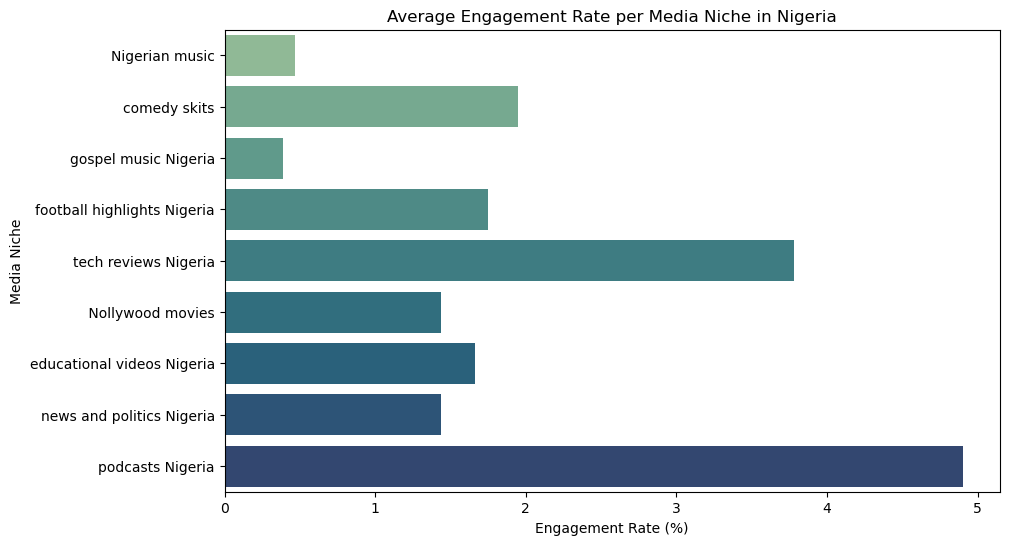

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(data=avg_metrics.reset_index(), x='engagement_rate', y='keyword', palette='crest')
plt.title("Average Engagement Rate per Media Niche in Nigeria")
plt.xlabel("Engagement Rate (%)")
plt.ylabel("Media Niche")
plt.show()

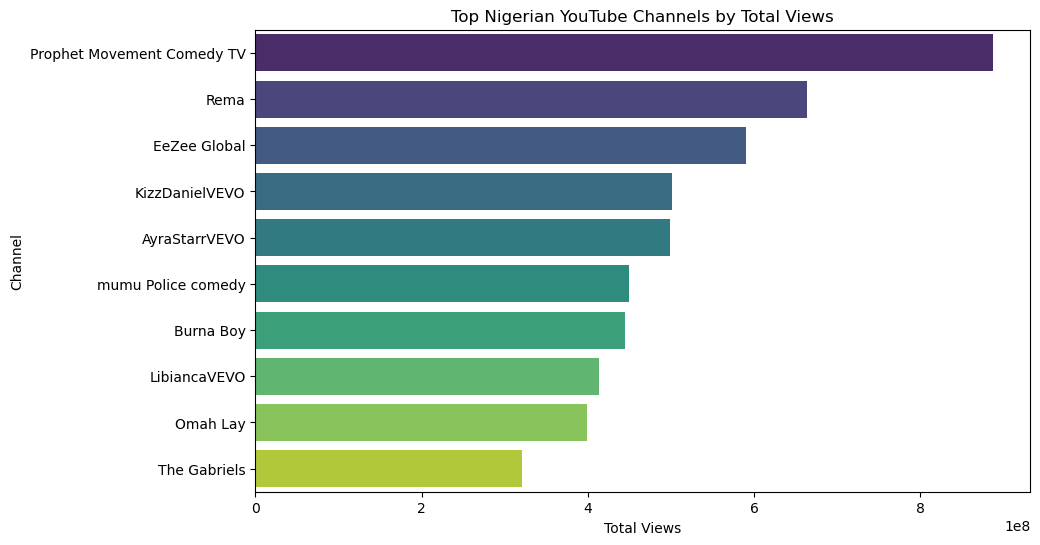

In [23]:
top_channels = df_full.groupby('channel')['views'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_channels.values, y=top_channels.index, palette='viridis')
plt.title("Top Nigerian YouTube Channels by Total Views")
plt.xlabel("Total Views")
plt.ylabel("Channel")
plt.show()

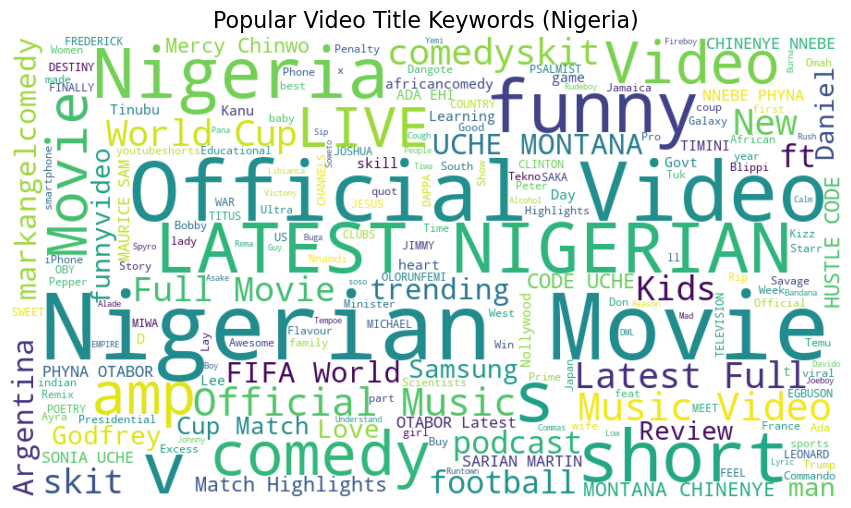

In [24]:
text = " ".join(df_full['title'])
wordcloud = WordCloud(width=900, height=500, background_color='white').generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Popular Video Title Keywords (Nigeria)", fontsize=16)
plt.show()


In [25]:
df_full.to_csv("youtube_nigeria_media_niches.csv", index=False)
print("✅ Data saved as youtube_nigeria_media_niches.csv")

✅ Data saved as youtube_nigeria_media_niches.csv
